# Sentimentanalyse

Sentimentanalyse, auch _Opinion Mining_ genannt, ist das herausfinden der Meinung, die in einem Text zu igendetwas geäußert wird.

Es werden zwei Dimensionen, entlang denen Text klassifiziert werden können, unterschieden: 
 * Objektiv vs. Subjektiv und 
 * Negativ - Neutral - Positiv.

Längere Texte können natürlich mehrere Meinungen zu den gleichen und zu verschiedenen Sachen enthalten.

Unsere einfache Hypothese ist, dass es Wörter gibt, die eine stark positives oder negatives Sentiment verkörpern, und das es reicht diese Wörter zu finden, um einen Text zu klassifizieren. Diese Annahme ist natürlich nicht ganz korrekt. Eine positive ode negative Meinung hängt natürlich von mehr als nur von einzelnen Wörtern ab: insbesondere  Negation kann die Bedeutung eines Wortes grundlegend ändern. Einige ganz neue Verfahren (Stichwörter: ELMO und BERT) können auch mit der unterschiedliche Bedeutung von Wörtern in Abhängigkeit der umgebenden Wörter umgehen. Wir kommen aber schon ganz weit, wenn wir nur einzelne Wörter verwenden. Verfahren, die nur einzelne Wörter verwenden, ohne ihre Beziehungen zu berücksichtigen, nennt man übrigens _Bag of Word_-Verfahren.

## Tools

Für die Sentimentanalyse brauchen wir in Grunde genommen nur Listen mit positiven und negativen Wörtern und eine Funktion, die zählt wie viele positive und negative Wörter es in einem Text gibt. Es gibt aber auch Tools, die das alles ganz unkomplziert für uns erledigen können. Für die Sentimentanalyse können wir die Bibiothek _TextBlob_ nutzen.

Das ist jetzt die dritte Bibliothek für NLP. Was sind die Unterschiede?

* NLTK: Eine Sammlung mit sehr vielen Algorithmen, meistens sprachunabhängig oder für viele Sprachen geeignet. Oft auch viele unterschiedliche Algorithmen für dieselbe Aufgabe. Ein Eldorado für Experte, die experimentieren und selber neue Anwendungen entwickeln wollen.
* TextBlob: eine Auswahl von Algorithmen aus NLTK, die zusammen eine Standard-Analyse eines Textes für einige wenige Sprachen ausführen können. Wenig Vorwissn erforderlich, einfach einzusetzen, aber ohne Möglichkeiten, etwas anzupassen.
* Spacy: von der Idee und Funktionalität sehr ähnlich zu TextBlob, etwas umfangreicher und vorallem mit eigener sehr performante Implementierung.

Weder NLTK noch Spacy enthalten eine fertig eingebaute Sentimentanalyse für Deutsche Texte. TextBlob bietet diese Funktionalität aber.

### TextBlob: Simplified Text Processing
TextBlob ist die Basis für natural language processing (NLP) mit Python – sowohl für Python 2 als auch 3. Damit sind viele Ansätze wie etwa Erkennen von Wortarten, Extraktion von Substantiven, Stimmungsanalyse und auch Klassifizierungen möglich. So richtig zur Geltung kommt die Bibliothek in der englischen Sprache, aber inzwischen gibt es mit textblob-de eine Erweiterung, mit der sich auch deutsche Texte untersuchen lassen.

### In diesem kleinen Projekt
Deutsche und englische Kommantare aus Amazon werden mit TextBlobDE und TextBlob analysiert. 
Damit werden wir das Ergebnis des TextBlobs herausfinden.

##### Zuerst muss man Textblob-de installieren.

In [1]:
# !pip install -U textblob-de==0.4.3
# !python -m textblob.download_corpora

## Erstmal importiere ich benötige Bibliotheken.

In [2]:
import pandas as pd # für analyse Daten, die in CSV format.
import numpy as np # aus der Daten sinvolle Series darstellen zu können
import matplotlib.pyplot as plt # zur Visualisierung
import textblob # Sentiment Analyse
from textblob_de import TextBlobDE
from textblob import TextBlob

## Daten

- Als Texte werde ich 'Amazon Reviews Data Sets' von Kaggle verwenden, da von Kaggle sowohl Deutsch als auch English Datensätze gibt.
- Natürlich werde ich die Daten nicht ins Github-Repo hochladen, da sie zu groß sind. 
- Aber falls sie Interresse haben, können sie einfach die Daten von Kaggle  herunterladen.

In [3]:
dt_deutsch = pd.read_csv("Amazon-Deutsch-Dataset.csv") # https://www.kaggle.com/dsonparote/amazon-deutsch-review-dataset
dt_eng = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv") # https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products

In [4]:
dt_eng.head() # Damit werden wir durchschauen, wie unsere Daten aussieht.

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [5]:
dt_deutsch.head()

,Unnamed: 0,web-scraper-order,web-scraper-start-url,author,title,date,content,rating,next,next-href,Unnamed: 9
0,0,1582056286-2631,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,MHS,Das Beste iPhone aller Zeiten,5. Januar 2020,Ich bin sehr zufrieden mit dem iPhone 11. Der ...,"5,0 von 5 Sternen",Weiter→,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,NaN
1,1,1582056184-2351,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,Amazon Customer,besser als beim hersteller,21. September 2019,"gestern bestellt, heute geliefert. besser geht...","5,0 von 5 Sternen",NaN,NaN,NaN
2,2,1582056243-2561,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,Joko Müller,Gutes Handy mit kleinen Schwächen,27. Oktober 2019,"Ich mach es mal kurz:\nGut: Optik, Verarbeitun...","4,0 von 5 Sternen",Weiter→,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,NaN
3,3,1582056201-2410,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,Davorko,Ein sehr edles Stück dieses IPHONE 11,2. Januar 2020,Amazon hat wieder super-schnell geliefert. Dan...,"5,0 von 5 Sternen",Weiter→,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,NaN
4,4,1582056246-2585,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,Chiara Natalia Sozzi,Super,18. Oktober 2019,"Viel früher angekommen als angegeben, tolles H...","5,0 von 5 Sternen",Weiter→,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,NaN


In [6]:
dt_deutsch.info() # Datentypen 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3413 non-null   int64  
 1   web-scraper-order      3413 non-null   object 
 2   web-scraper-start-url  3413 non-null   object 
 3   author                 3409 non-null   object 
 4   title                  3409 non-null   object 
 5   date                   3409 non-null   object 
 6   content                3409 non-null   object 
 7   rating                 3409 non-null   object 
 8   next                   3299 non-null   object 
 9   next-href              3303 non-null   object 
 10  Unnamed: 9             0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 293.4+ KB


In [7]:
dt_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [8]:
dt_deutsch['rating'].unique() 

array(['5,0 von 5 Sternen', '4,0 von 5 Sternen', '3,0 von 5 Sternen',
       '1,0 von 5 Sternen', '2,0 von 5 Sternen', nan], dtype=object)

##### Wir sollen 'rating' als Nummern verandern.

In [9]:
dt_deutsch['rating'].replace('5,0 von 5 Sternen', 5, inplace=True)
dt_deutsch['rating'].replace('4,0 von 5 Sternen', 4, inplace=True)
dt_deutsch['rating'].replace('3,0 von 5 Sternen', 3, inplace=True)
dt_deutsch['rating'].replace('2,0 von 5 Sternen', 2, inplace=True)
dt_deutsch['rating'].replace('1,0 von 5 Sternen', 1, inplace=True)

In [10]:
dt_deutsch['rating'].value_counts() # Wie viele Bewertungen mit Sternen haben wir.

5.0    1038
1.0    1010
3.0     581
2.0     553
4.0     227
Name: rating, dtype: int64

In [11]:
dt_eng['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

In [12]:
deutsch_5 = dt_deutsch[dt_deutsch['rating'] == 5]
deutsch_1 = dt_deutsch[dt_deutsch['rating'] == 1]
eng_5 = dt_eng[dt_eng['reviews.rating'] == 5]
eng_1 = dt_eng[dt_eng['reviews.rating'] == 1]

### Ich möchte 5-Sterne-Bewertungen als positiv bezeichnen und 1-Sterne-Bewertungen als negativ. Deswegen bekomme ich von den beiden Datensatzen 956 Beispielzeilen,weil die englische Datensatz nur 965 1-Sterne-Bewertungen hat.

In [13]:
deutsch_5 = deutsch_5.sample(n = 965) 
deutsch_1 = deutsch_1.sample(n = 965)
eng_5 = eng_5.sample(n = 965)
eng_1 = eng_1.sample(n = 965)

In [14]:
deutsch_5['content'][3] # beispiel Kommenter

'Amazon hat wieder super-schnell geliefert. Danke dafür. Das Iphone 11 ist soweit ich es bis heute beurteilen kann, das beste Produkt aus der IPHONE-Reihe seit Jahren. Die Kamera liefert fantastische Bilder, das Handy liegt gut in der Hand. Nur der Preis könnte etwas günstiger sein, aber da sind wir bei Apple daran schon gewohnt. Kann dieses Iphone uneingeschränkt jedem empfehlen. Kauft bei Amazon, da habt ihr ohnehin das beste Kundenservice ever.'

In [15]:
TextBlobDE(deutsch_5['content'][3]).sentiment # beispiel Sentiment Ergebnis

Sentiment(polarity=0.2857142857142857, subjectivity=0.0)

In [16]:
'''Bei diesen Funktionen mit TextBlob werden wir 'Polaritywerten' von allen Kommentaren  erhalten.  '''

def senti_deutsch(x):
    return TextBlobDE(x).sentiment.polarity # TextBlobDE ist für deutsche Texte geignet.

def senti_eng(x):
    return TextBlob(x).sentiment.polarity

In [17]:
deutsch_5['senti_score'] = deutsch_5['content'].apply(senti_deutsch)
deutsch_1['senti_score'] = deutsch_1['content'].apply(senti_deutsch)

In [18]:
eng_5['senti_score'] = eng_5['reviews.text'].apply(senti_eng)
eng_1['senti_score'] = eng_1['reviews.text'].apply(senti_eng)

## Visualisierung

In diesem Punkt sollen wir die Verteilung des Ergebnisses in einem Histogram visualisieren. Damit können wir entscheiden, ob TextBlob und TextBlobDE genug genaue Ergebnisse mit sich bringen können.

In [19]:
def Visual(senti):
    plt.style.use('fivethirtyeight')

    sentiscore = senti
    counts = pd.value_counts(senti.values)
    
    bins = [-1, -0.8 , -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]

    plt.hist(sentiscore, bins=bins, edgecolor='black')

    median_age = 29
    color = '#fc4f30'

    # plt.axvline(median_age, color=color, label='Age Median', linewidth=2)

    # plt.legend()

    plt.title('Verteilung der Polarity')
    plt.xlabel('Senti Score')
    plt.ylabel('Anzahlen')

    plt.tight_layout()

    plt.show()

#### TextBlobDe für deutsche positive Kommentare

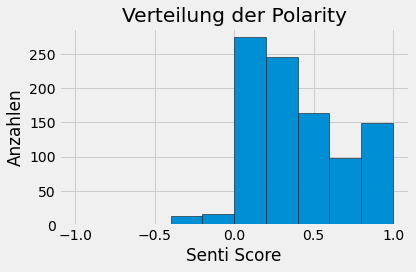

In [20]:
Visual(deutsch_5['senti_score'])

#### <span style=color:green> Wie man auf der Grafik einfach bemerkan kann, gibt TextBlobDE für deutsche positive Texte  ziemlich gutes Ergebnis. </span>

#### TextBlobDe für deutsche negative Kommentare

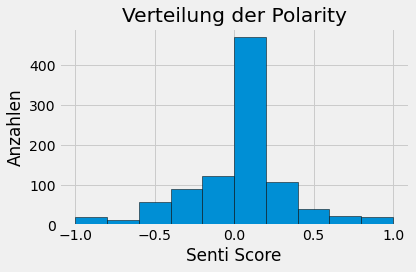

In [21]:
Visual(deutsch_1['senti_score'])

####  <span style= color:red;> Wie gesehen, hat TextBlobDE nicht genügend richtige Ergebnisse für negative deutsche Texte geliefert. </span>

#### TextBlob für englische positive Kommentare

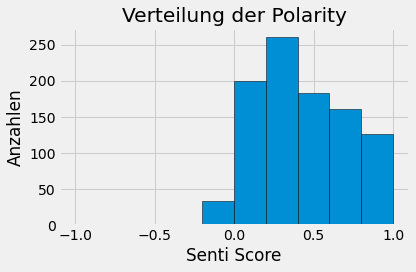

In [22]:
Visual(eng_5['senti_score'])

#### <span style=color:green> Aus dem ausgedrückten Histogramm  kann man erwâhnen, dass TextBlob optimal für die englische pozitive Texte ist . </span>

#### TextBlob für englische negative Kommentare

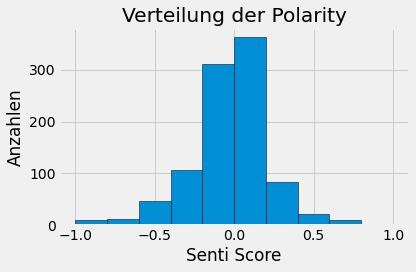

In [23]:
Visual(eng_1['senti_score'])

#### TextBlob ist für die englische negative Texte nicht genügend erfolgreich.

***

## An diesem Schritt werde ich den prozentualen Erfolg des TextBlobs berechnen.

In [24]:
''' Für positive Kommentare soll die 'Senti_Score' größer als 0 '''
''' Für negative Kommentare soll das 'Senti_Score' kleiner als 0 '''
''' Wir zâhlen die sogenannte richtige Antworten. '''

count_D5_P = sum(1 for i in deutsch_5['senti_score'] if i > 0)
count_D1_N = sum(1 for i in deutsch_1['senti_score'] if i < 0)
count_E5_P = sum(1 for i in eng_5['senti_score'] if i > 0)
count_E1_N = sum(1 for i in eng_1['senti_score'] if i < 0)

positives_success = count_E5_P / len(eng_5) * 100 
negatives_success = count_E1_N / len(eng_1) * 100
positive_erfolg = count_D5_P / len(deutsch_5) * 100
negative_erfolg = count_D1_N / len(deutsch_1) * 100
deutsch_erfolg = ((count_D5_P + count_D1_N ) / (len(deutsch_5)+len(deutsch_1)))*100
english_success = ((count_E5_P + count_E1_N ) / (len(eng_5)+len(eng_1)))*100

### In einer Tabelle können wir schauen, wie viel Prozent richtige Ergebnisse wir bekommen haben.

In [25]:
raw_data = {'sprachen': ['Englisch','Deutsch'],
            'positive_score_%': [int(positives_success), int(positive_erfolg)],
            'negative_score_%': [int(negatives_success), int(negative_erfolg)],
            'total_score_%': [int(english_success), int(deutsch_erfolg)]}
tabelle = pd.DataFrame(raw_data)
tabelle

,sprachen,positive_score_%,negative_score_%,total_score_%
0,Englisch,88,50,69
1,Deutsch,77,31,54


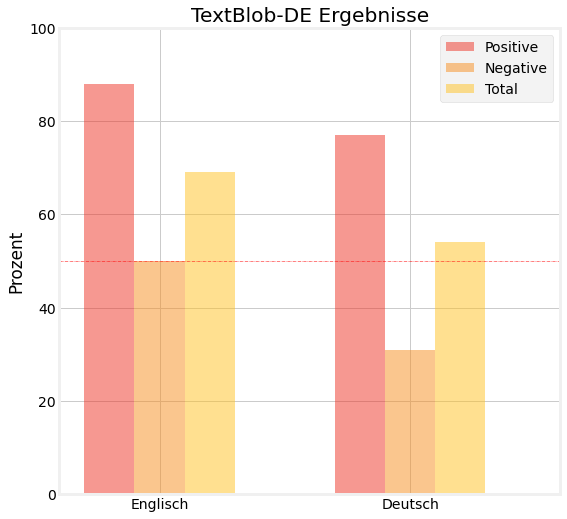

In [43]:
# Setting the positions and width for the bars
pos = list(range(len(tabelle['positive_score_%']))) 
width = 0.2 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(8,8))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        tabelle['positive_score_%'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=tabelle['sprachen'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        tabelle['negative_score_%'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=tabelle['sprachen'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        tabelle['total_score_%'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label='Total')

# Set the y axis label
ax.set_ylabel('Prozent')

# Set the chart's title
ax.set_title('TextBlob-DE Ergebnisse')

# Set the position of the x ticks
ax.set_xticks([p + 1 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(tabelle['sprachen'])

ax.patch.set_facecolor('white')
fig.patch.set_facecolor('xkcd:white')



# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 100] )

# Adding the legend and showing the plot
plt.legend(['Positive', 'Negative', 'Total'], loc='upper right')
ax.axhline(y=50, xmin=0.0, xmax=1.0, linewidth='0.5', linestyle='-.', color='r')
plt.grid(True)
plt.show()

***

## <span style=color:#8FBC8F> Am Ende des Analysis haben wir herausgefunden, dass TextBlob in positiven Texte besser Ergebnis gibt und TextBlob besser als TextBlobDE ist. </span>